In [110]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import pickle 
from ply import write_ply

from utilities import *
from VoxelGrid import *
import os

from PIL import ImageFont
from PIL import ImageDraw 

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device='cuda' if torch.cuda.is_available() else 'cpu'

N_points=200
dataset = "../nerf_synthetic/ficus"


In [111]:
focal, all_c2w, all_gt = get_data(dataset)

LOAD DATA ../nerf_synthetic/ficus/train


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 34.57it/s]


In [112]:
red = 8
target_ims, rays = reduce_data(all_c2w, all_gt, focal, red)
im_w = target_ims[0].shape[0]
print(im_w)

red = 2
disp_ims, disp_rays = reduce_data(all_c2w, all_gt, focal, red)
disp_im_w = disp_ims[0].shape[0]
print(disp_im_w)

100
400


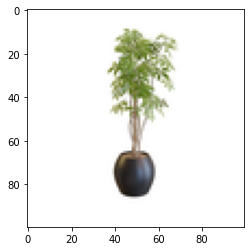

In [113]:
plt.imshow(target_ims[1])
plt.show()

In [114]:
test_focal, test_c2w, test_gt = get_data(dataset, "test")

LOAD DATA ../nerf_synthetic/ficus/test


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 36.45it/s]


In [115]:
red = 4
disp_ims_test, disp_rays_test = reduce_data(test_c2w, test_gt,test_focal, red)
disp_im_w = disp_ims_test[0].shape[0]

In [116]:
D = RayDataset(target_ims, rays, device)
train_loader = torch.utils.data.DataLoader(D, batch_size=5000, shuffle=True)

100%|█████████████████████████████████████████| 100/100 [00:17<00:00,  5.78it/s]


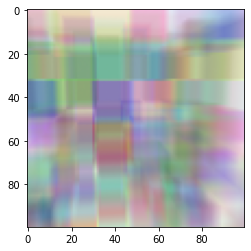

In [121]:
VG = VoxelGrid(8, 1.4)

plt.imshow(VG.render_large_image_from_rays(rays[1],(1000, 1.2)))

In [122]:
losses=[]

  0%|                                                     | 0/2 [00:00<?, ?it/s]

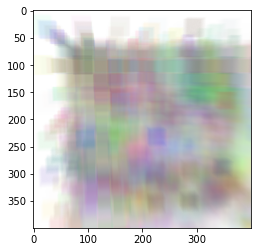

Train Epoch: 0 [0/200 (0%)]	Loss: 0.284710
Train Epoch: 0 [10/200 (5%)]	Loss: 0.022937
Train Epoch: 0 [20/200 (10%)]	Loss: 0.022498
Train Epoch: 0 [30/200 (15%)]	Loss: 0.020446
Train Epoch: 0 [40/200 (20%)]	Loss: 0.020991
Train Epoch: 0 [50/200 (25%)]	Loss: 0.022698
Train Epoch: 0 [60/200 (30%)]	Loss: 0.022333
Train Epoch: 0 [70/200 (35%)]	Loss: 0.022110
Train Epoch: 0 [80/200 (40%)]	Loss: 0.020203
Train Epoch: 0 [90/200 (45%)]	Loss: 0.020826
Train Epoch: 0 [100/200 (50%)]	Loss: 0.020982
Train Epoch: 0 [110/200 (55%)]	Loss: 0.021473
Train Epoch: 0 [120/200 (60%)]	Loss: 0.020952
Train Epoch: 0 [130/200 (65%)]	Loss: 0.019898
Train Epoch: 0 [140/200 (70%)]	Loss: 0.020967
Train Epoch: 0 [150/200 (75%)]	Loss: 0.021731
Train Epoch: 0 [160/200 (80%)]	Loss: 0.021202
Train Epoch: 0 [170/200 (85%)]	Loss: 0.021574
Train Epoch: 0 [180/200 (90%)]	Loss: 0.021094
Train Epoch: 0 [190/200 (95%)]	Loss: 0.019920


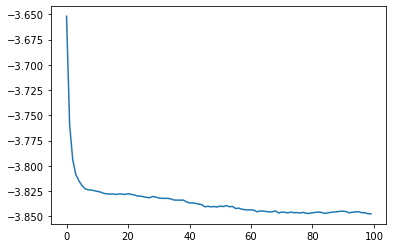

 50%|██████████████████████▌                      | 1/2 [00:33<00:33, 33.66s/it]

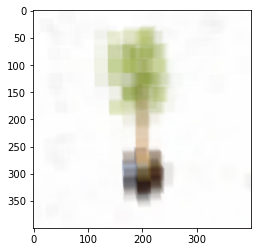

Train Epoch: 1 [0/200 (0%)]	Loss: 0.022149
Train Epoch: 1 [10/200 (5%)]	Loss: 0.022030
Train Epoch: 1 [20/200 (10%)]	Loss: 0.022384
Train Epoch: 1 [30/200 (15%)]	Loss: 0.019838
Train Epoch: 1 [40/200 (20%)]	Loss: 0.019165
Train Epoch: 1 [50/200 (25%)]	Loss: 0.020273
Train Epoch: 1 [60/200 (30%)]	Loss: 0.021415
Train Epoch: 1 [70/200 (35%)]	Loss: 0.023508
Train Epoch: 1 [80/200 (40%)]	Loss: 0.021838
Train Epoch: 1 [90/200 (45%)]	Loss: 0.020561
Train Epoch: 1 [100/200 (50%)]	Loss: 0.022956
Train Epoch: 1 [110/200 (55%)]	Loss: 0.021616
Train Epoch: 1 [120/200 (60%)]	Loss: 0.021345
Train Epoch: 1 [130/200 (65%)]	Loss: 0.021507
Train Epoch: 1 [140/200 (70%)]	Loss: 0.022701
Train Epoch: 1 [150/200 (75%)]	Loss: 0.023126
Train Epoch: 1 [160/200 (80%)]	Loss: 0.021059
Train Epoch: 1 [170/200 (85%)]	Loss: 0.021000
Train Epoch: 1 [180/200 (90%)]	Loss: 0.023597
Train Epoch: 1 [190/200 (95%)]	Loss: 0.021770


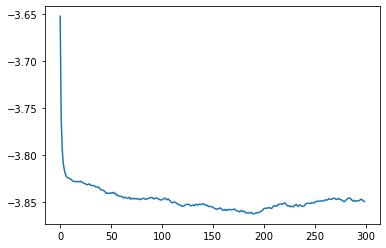

  0%|                                                     | 0/4 [00:00<?, ?it/s]

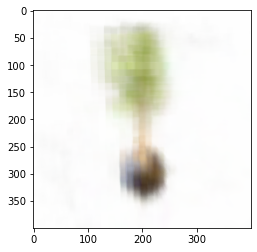

Train Epoch: 0 [0/200 (0%)]	Loss: 0.021362
Train Epoch: 0 [10/200 (5%)]	Loss: 0.017927
Train Epoch: 0 [20/200 (10%)]	Loss: 0.015896
Train Epoch: 0 [30/200 (15%)]	Loss: 0.015235
Train Epoch: 0 [40/200 (20%)]	Loss: 0.016547
Train Epoch: 0 [50/200 (25%)]	Loss: 0.015570
Train Epoch: 0 [60/200 (30%)]	Loss: 0.015169
Train Epoch: 0 [70/200 (35%)]	Loss: 0.015197
Train Epoch: 0 [80/200 (40%)]	Loss: 0.014406
Train Epoch: 0 [90/200 (45%)]	Loss: 0.014670
Train Epoch: 0 [100/200 (50%)]	Loss: 0.015793
Train Epoch: 0 [110/200 (55%)]	Loss: 0.014125
Train Epoch: 0 [120/200 (60%)]	Loss: 0.014690
Train Epoch: 0 [130/200 (65%)]	Loss: 0.014677
Train Epoch: 0 [140/200 (70%)]	Loss: 0.013961
Train Epoch: 0 [150/200 (75%)]	Loss: 0.015281
Train Epoch: 0 [160/200 (80%)]	Loss: 0.012974
Train Epoch: 0 [170/200 (85%)]	Loss: 0.013552
Train Epoch: 0 [180/200 (90%)]	Loss: 0.013532
Train Epoch: 0 [190/200 (95%)]	Loss: 0.013365


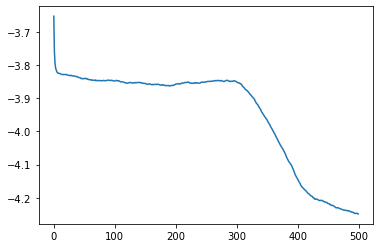

 25%|███████████▎                                 | 1/4 [01:01<03:04, 61.46s/it]

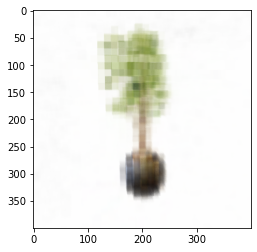

Train Epoch: 1 [0/200 (0%)]	Loss: 0.014518
Train Epoch: 1 [10/200 (5%)]	Loss: 0.014310
Train Epoch: 1 [20/200 (10%)]	Loss: 0.014141
Train Epoch: 1 [30/200 (15%)]	Loss: 0.012956
Train Epoch: 1 [40/200 (20%)]	Loss: 0.013698
Train Epoch: 1 [50/200 (25%)]	Loss: 0.013541
Train Epoch: 1 [60/200 (30%)]	Loss: 0.012003
Train Epoch: 1 [70/200 (35%)]	Loss: 0.013072
Train Epoch: 1 [80/200 (40%)]	Loss: 0.014065
Train Epoch: 1 [90/200 (45%)]	Loss: 0.012863
Train Epoch: 1 [100/200 (50%)]	Loss: 0.013680
Train Epoch: 1 [110/200 (55%)]	Loss: 0.015128
Train Epoch: 1 [120/200 (60%)]	Loss: 0.012925
Train Epoch: 1 [130/200 (65%)]	Loss: 0.012265
Train Epoch: 1 [140/200 (70%)]	Loss: 0.013499
Train Epoch: 1 [150/200 (75%)]	Loss: 0.013410
Train Epoch: 1 [160/200 (80%)]	Loss: 0.013950
Train Epoch: 1 [170/200 (85%)]	Loss: 0.013814
Train Epoch: 1 [180/200 (90%)]	Loss: 0.015122
Train Epoch: 1 [190/200 (95%)]	Loss: 0.015193


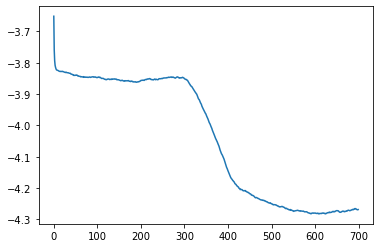

 50%|██████████████████████▌                      | 2/4 [02:02<02:02, 61.20s/it]

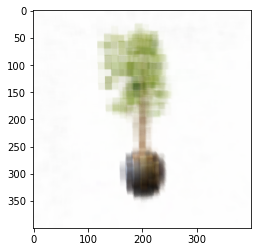

Train Epoch: 2 [0/200 (0%)]	Loss: 0.013006
Train Epoch: 2 [10/200 (5%)]	Loss: 0.012740
Train Epoch: 2 [20/200 (10%)]	Loss: 0.013189
Train Epoch: 2 [30/200 (15%)]	Loss: 0.013909
Train Epoch: 2 [40/200 (20%)]	Loss: 0.013632
Train Epoch: 2 [50/200 (25%)]	Loss: 0.013487
Train Epoch: 2 [60/200 (30%)]	Loss: 0.012411
Train Epoch: 2 [70/200 (35%)]	Loss: 0.013008
Train Epoch: 2 [80/200 (40%)]	Loss: 0.014227
Train Epoch: 2 [90/200 (45%)]	Loss: 0.014267
Train Epoch: 2 [100/200 (50%)]	Loss: 0.014057
Train Epoch: 2 [110/200 (55%)]	Loss: 0.013188
Train Epoch: 2 [120/200 (60%)]	Loss: 0.014132
Train Epoch: 2 [130/200 (65%)]	Loss: 0.013274
Train Epoch: 2 [140/200 (70%)]	Loss: 0.012202
Train Epoch: 2 [150/200 (75%)]	Loss: 0.013162
Train Epoch: 2 [160/200 (80%)]	Loss: 0.013372
Train Epoch: 2 [170/200 (85%)]	Loss: 0.014424
Train Epoch: 2 [180/200 (90%)]	Loss: 0.014824
Train Epoch: 2 [190/200 (95%)]	Loss: 0.014440


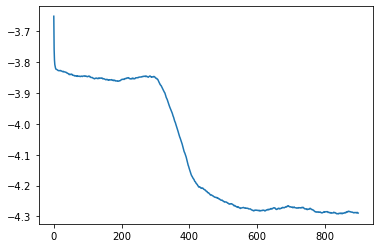

 75%|█████████████████████████████████▊           | 3/4 [03:04<01:01, 61.51s/it]

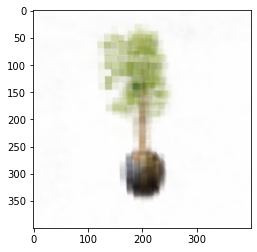

Train Epoch: 3 [0/200 (0%)]	Loss: 0.013241
Train Epoch: 3 [10/200 (5%)]	Loss: 0.013744
Train Epoch: 3 [20/200 (10%)]	Loss: 0.013595
Train Epoch: 3 [30/200 (15%)]	Loss: 0.013965
Train Epoch: 3 [40/200 (20%)]	Loss: 0.013970
Train Epoch: 3 [50/200 (25%)]	Loss: 0.013374
Train Epoch: 3 [60/200 (30%)]	Loss: 0.013890
Train Epoch: 3 [70/200 (35%)]	Loss: 0.013260
Train Epoch: 3 [80/200 (40%)]	Loss: 0.013677
Train Epoch: 3 [90/200 (45%)]	Loss: 0.012759
Train Epoch: 3 [100/200 (50%)]	Loss: 0.013945
Train Epoch: 3 [110/200 (55%)]	Loss: 0.013809
Train Epoch: 3 [120/200 (60%)]	Loss: 0.014692
Train Epoch: 3 [130/200 (65%)]	Loss: 0.014828
Train Epoch: 3 [140/200 (70%)]	Loss: 0.013937
Train Epoch: 3 [150/200 (75%)]	Loss: 0.014279
Train Epoch: 3 [160/200 (80%)]	Loss: 0.014697
Train Epoch: 3 [170/200 (85%)]	Loss: 0.014189
Train Epoch: 3 [180/200 (90%)]	Loss: 0.013431
Train Epoch: 3 [190/200 (95%)]	Loss: 0.012899


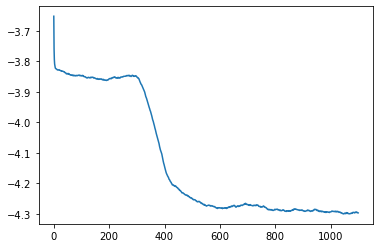

  0%|                                                     | 0/8 [00:00<?, ?it/s]

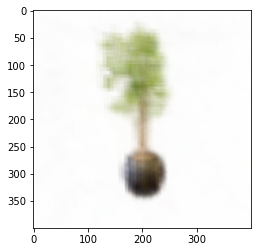

Train Epoch: 0 [0/200 (0%)]	Loss: 0.013203
Train Epoch: 0 [10/200 (5%)]	Loss: 0.014285
Train Epoch: 0 [20/200 (10%)]	Loss: 0.014151
Train Epoch: 0 [30/200 (15%)]	Loss: 0.013318
Train Epoch: 0 [40/200 (20%)]	Loss: 0.013000
Train Epoch: 0 [50/200 (25%)]	Loss: 0.013488
Train Epoch: 0 [60/200 (30%)]	Loss: 0.012854
Train Epoch: 0 [70/200 (35%)]	Loss: 0.013837
Train Epoch: 0 [80/200 (40%)]	Loss: 0.011818
Train Epoch: 0 [90/200 (45%)]	Loss: 0.013828
Train Epoch: 0 [100/200 (50%)]	Loss: 0.012908
Train Epoch: 0 [110/200 (55%)]	Loss: 0.012385
Train Epoch: 0 [120/200 (60%)]	Loss: 0.011452
Train Epoch: 0 [130/200 (65%)]	Loss: 0.012298
Train Epoch: 0 [140/200 (70%)]	Loss: 0.012691
Train Epoch: 0 [150/200 (75%)]	Loss: 0.010746
Train Epoch: 0 [160/200 (80%)]	Loss: 0.012461
Train Epoch: 0 [170/200 (85%)]	Loss: 0.011508
Train Epoch: 0 [180/200 (90%)]	Loss: 0.012380
Train Epoch: 0 [190/200 (95%)]	Loss: 0.011315


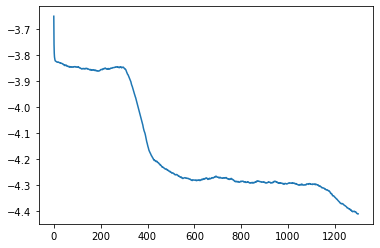

 12%|█████▌                                      | 1/8 [01:56<13:35, 116.57s/it]

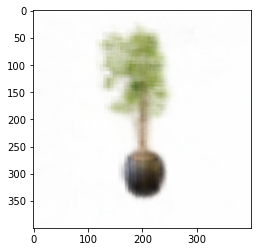

Train Epoch: 1 [0/200 (0%)]	Loss: 0.012035
Train Epoch: 1 [10/200 (5%)]	Loss: 0.012344
Train Epoch: 1 [20/200 (10%)]	Loss: 0.011483
Train Epoch: 1 [30/200 (15%)]	Loss: 0.011594
Train Epoch: 1 [40/200 (20%)]	Loss: 0.013525
Train Epoch: 1 [50/200 (25%)]	Loss: 0.011947
Train Epoch: 1 [60/200 (30%)]	Loss: 0.010955
Train Epoch: 1 [70/200 (35%)]	Loss: 0.012723
Train Epoch: 1 [80/200 (40%)]	Loss: 0.012591
Train Epoch: 1 [90/200 (45%)]	Loss: 0.012067
Train Epoch: 1 [100/200 (50%)]	Loss: 0.012371
Train Epoch: 1 [110/200 (55%)]	Loss: 0.011961
Train Epoch: 1 [120/200 (60%)]	Loss: 0.010445
Train Epoch: 1 [130/200 (65%)]	Loss: 0.011917
Train Epoch: 1 [140/200 (70%)]	Loss: 0.010587
Train Epoch: 1 [150/200 (75%)]	Loss: 0.011577
Train Epoch: 1 [160/200 (80%)]	Loss: 0.010069
Train Epoch: 1 [170/200 (85%)]	Loss: 0.011766
Train Epoch: 1 [180/200 (90%)]	Loss: 0.010842
Train Epoch: 1 [190/200 (95%)]	Loss: 0.011291


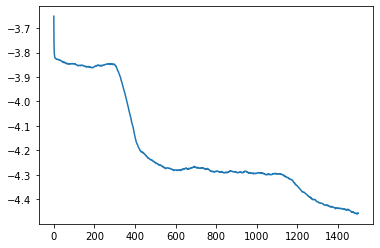

 25%|███████████                                 | 2/8 [03:53<11:39, 116.55s/it]

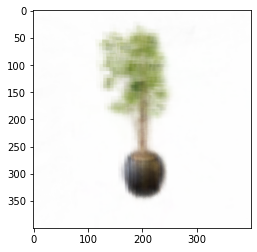

Train Epoch: 2 [0/200 (0%)]	Loss: 0.010867
Train Epoch: 2 [10/200 (5%)]	Loss: 0.011426
Train Epoch: 2 [20/200 (10%)]	Loss: 0.011461
Train Epoch: 2 [30/200 (15%)]	Loss: 0.010551
Train Epoch: 2 [40/200 (20%)]	Loss: 0.010570
Train Epoch: 2 [50/200 (25%)]	Loss: 0.011704
Train Epoch: 2 [60/200 (30%)]	Loss: 0.011435
Train Epoch: 2 [70/200 (35%)]	Loss: 0.011930
Train Epoch: 2 [80/200 (40%)]	Loss: 0.011360
Train Epoch: 2 [90/200 (45%)]	Loss: 0.010852
Train Epoch: 2 [100/200 (50%)]	Loss: 0.012263
Train Epoch: 2 [110/200 (55%)]	Loss: 0.011786
Train Epoch: 2 [120/200 (60%)]	Loss: 0.011881
Train Epoch: 2 [130/200 (65%)]	Loss: 0.010477
Train Epoch: 2 [140/200 (70%)]	Loss: 0.011418
Train Epoch: 2 [150/200 (75%)]	Loss: 0.010891
Train Epoch: 2 [160/200 (80%)]	Loss: 0.010614
Train Epoch: 2 [170/200 (85%)]	Loss: 0.010968
Train Epoch: 2 [180/200 (90%)]	Loss: 0.010993
Train Epoch: 2 [190/200 (95%)]	Loss: 0.010476


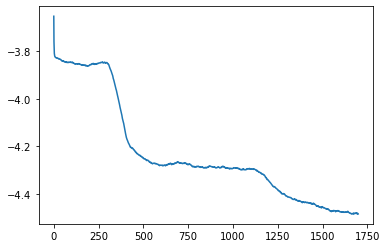

 38%|████████████████▌                           | 3/8 [05:49<09:42, 116.48s/it]

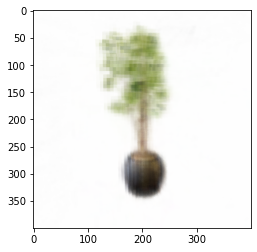

Train Epoch: 3 [0/200 (0%)]	Loss: 0.011128
Train Epoch: 3 [10/200 (5%)]	Loss: 0.010955
Train Epoch: 3 [20/200 (10%)]	Loss: 0.010678
Train Epoch: 3 [30/200 (15%)]	Loss: 0.011473
Train Epoch: 3 [40/200 (20%)]	Loss: 0.010857
Train Epoch: 3 [50/200 (25%)]	Loss: 0.011508
Train Epoch: 3 [60/200 (30%)]	Loss: 0.009998
Train Epoch: 3 [70/200 (35%)]	Loss: 0.012018
Train Epoch: 3 [80/200 (40%)]	Loss: 0.011245
Train Epoch: 3 [90/200 (45%)]	Loss: 0.011309
Train Epoch: 3 [100/200 (50%)]	Loss: 0.011022
Train Epoch: 3 [110/200 (55%)]	Loss: 0.010710
Train Epoch: 3 [120/200 (60%)]	Loss: 0.010414
Train Epoch: 3 [130/200 (65%)]	Loss: 0.011252
Train Epoch: 3 [140/200 (70%)]	Loss: 0.011139
Train Epoch: 3 [150/200 (75%)]	Loss: 0.012026
Train Epoch: 3 [160/200 (80%)]	Loss: 0.009983
Train Epoch: 3 [170/200 (85%)]	Loss: 0.011113
Train Epoch: 3 [180/200 (90%)]	Loss: 0.010880
Train Epoch: 3 [190/200 (95%)]	Loss: 0.011767


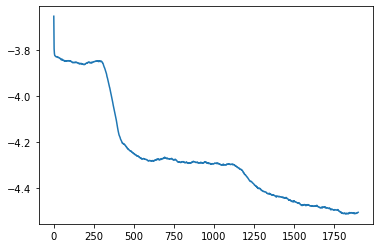

 50%|██████████████████████                      | 4/8 [07:45<07:44, 116.16s/it]

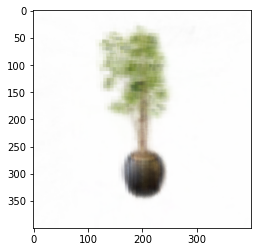

Train Epoch: 4 [0/200 (0%)]	Loss: 0.010346
Train Epoch: 4 [10/200 (5%)]	Loss: 0.011293
Train Epoch: 4 [20/200 (10%)]	Loss: 0.010927
Train Epoch: 4 [30/200 (15%)]	Loss: 0.012480
Train Epoch: 4 [40/200 (20%)]	Loss: 0.010902
Train Epoch: 4 [50/200 (25%)]	Loss: 0.011113
Train Epoch: 4 [60/200 (30%)]	Loss: 0.010261
Train Epoch: 4 [70/200 (35%)]	Loss: 0.011493
Train Epoch: 4 [80/200 (40%)]	Loss: 0.011631
Train Epoch: 4 [90/200 (45%)]	Loss: 0.010661
Train Epoch: 4 [100/200 (50%)]	Loss: 0.010954
Train Epoch: 4 [110/200 (55%)]	Loss: 0.009977
Train Epoch: 4 [120/200 (60%)]	Loss: 0.011440
Train Epoch: 4 [130/200 (65%)]	Loss: 0.011667
Train Epoch: 4 [140/200 (70%)]	Loss: 0.009782
Train Epoch: 4 [150/200 (75%)]	Loss: 0.011604
Train Epoch: 4 [160/200 (80%)]	Loss: 0.010410
Train Epoch: 4 [170/200 (85%)]	Loss: 0.010764
Train Epoch: 4 [180/200 (90%)]	Loss: 0.011035
Train Epoch: 4 [190/200 (95%)]	Loss: 0.009741


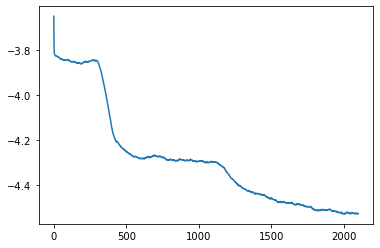

 62%|███████████████████████████▌                | 5/8 [09:41<05:48, 116.31s/it]

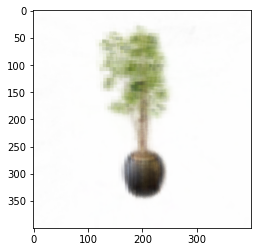

Train Epoch: 5 [0/200 (0%)]	Loss: 0.010490
Train Epoch: 5 [10/200 (5%)]	Loss: 0.011100
Train Epoch: 5 [20/200 (10%)]	Loss: 0.010395
Train Epoch: 5 [30/200 (15%)]	Loss: 0.009518
Train Epoch: 5 [40/200 (20%)]	Loss: 0.009544
Train Epoch: 5 [50/200 (25%)]	Loss: 0.011204
Train Epoch: 5 [60/200 (30%)]	Loss: 0.010753
Train Epoch: 5 [70/200 (35%)]	Loss: 0.009955
Train Epoch: 5 [80/200 (40%)]	Loss: 0.011058
Train Epoch: 5 [90/200 (45%)]	Loss: 0.011072
Train Epoch: 5 [100/200 (50%)]	Loss: 0.012162
Train Epoch: 5 [110/200 (55%)]	Loss: 0.011002
Train Epoch: 5 [120/200 (60%)]	Loss: 0.010443
Train Epoch: 5 [130/200 (65%)]	Loss: 0.010617
Train Epoch: 5 [140/200 (70%)]	Loss: 0.011300
Train Epoch: 5 [150/200 (75%)]	Loss: 0.010461
Train Epoch: 5 [160/200 (80%)]	Loss: 0.011403
Train Epoch: 5 [170/200 (85%)]	Loss: 0.009806
Train Epoch: 5 [180/200 (90%)]	Loss: 0.010003
Train Epoch: 5 [190/200 (95%)]	Loss: 0.010263


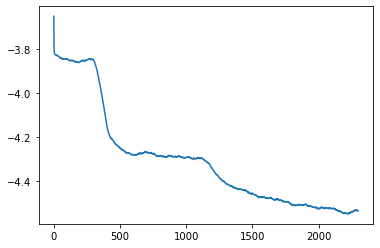

 75%|█████████████████████████████████           | 6/8 [11:38<03:52, 116.40s/it]

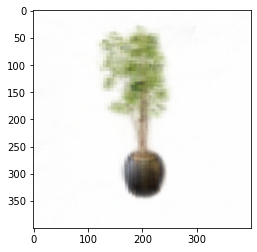

Train Epoch: 6 [0/200 (0%)]	Loss: 0.010259
Train Epoch: 6 [10/200 (5%)]	Loss: 0.010682
Train Epoch: 6 [20/200 (10%)]	Loss: 0.011172
Train Epoch: 6 [30/200 (15%)]	Loss: 0.010276
Train Epoch: 6 [40/200 (20%)]	Loss: 0.010381
Train Epoch: 6 [50/200 (25%)]	Loss: 0.009519
Train Epoch: 6 [60/200 (30%)]	Loss: 0.009858
Train Epoch: 6 [70/200 (35%)]	Loss: 0.010030
Train Epoch: 6 [80/200 (40%)]	Loss: 0.010192
Train Epoch: 6 [90/200 (45%)]	Loss: 0.011056
Train Epoch: 6 [100/200 (50%)]	Loss: 0.011423
Train Epoch: 6 [110/200 (55%)]	Loss: 0.010837
Train Epoch: 6 [120/200 (60%)]	Loss: 0.010351
Train Epoch: 6 [130/200 (65%)]	Loss: 0.010215
Train Epoch: 6 [140/200 (70%)]	Loss: 0.011470
Train Epoch: 6 [150/200 (75%)]	Loss: 0.009970
Train Epoch: 6 [160/200 (80%)]	Loss: 0.009795
Train Epoch: 6 [170/200 (85%)]	Loss: 0.010765
Train Epoch: 6 [180/200 (90%)]	Loss: 0.010063
Train Epoch: 6 [190/200 (95%)]	Loss: 0.011629


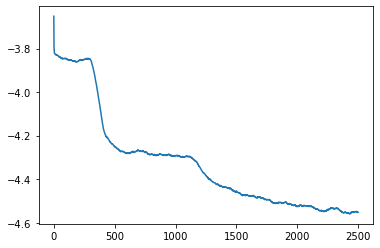

 88%|██████████████████████████████████████▌     | 7/8 [13:34<01:56, 116.44s/it]

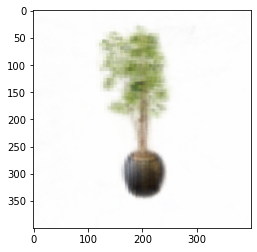

Train Epoch: 7 [0/200 (0%)]	Loss: 0.010926
Train Epoch: 7 [10/200 (5%)]	Loss: 0.011646
Train Epoch: 7 [20/200 (10%)]	Loss: 0.010143
Train Epoch: 7 [30/200 (15%)]	Loss: 0.010935
Train Epoch: 7 [40/200 (20%)]	Loss: 0.010226
Train Epoch: 7 [50/200 (25%)]	Loss: 0.009698
Train Epoch: 7 [60/200 (30%)]	Loss: 0.010438
Train Epoch: 7 [70/200 (35%)]	Loss: 0.010627
Train Epoch: 7 [80/200 (40%)]	Loss: 0.011058
Train Epoch: 7 [90/200 (45%)]	Loss: 0.010134
Train Epoch: 7 [100/200 (50%)]	Loss: 0.010167
Train Epoch: 7 [110/200 (55%)]	Loss: 0.010511
Train Epoch: 7 [120/200 (60%)]	Loss: 0.010238
Train Epoch: 7 [130/200 (65%)]	Loss: 0.009413
Train Epoch: 7 [140/200 (70%)]	Loss: 0.010908
Train Epoch: 7 [150/200 (75%)]	Loss: 0.009811
Train Epoch: 7 [160/200 (80%)]	Loss: 0.010890
Train Epoch: 7 [170/200 (85%)]	Loss: 0.010158
Train Epoch: 7 [180/200 (90%)]	Loss: 0.011005
Train Epoch: 7 [190/200 (95%)]	Loss: 0.010489


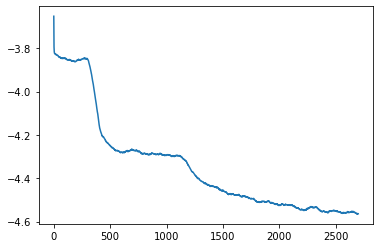

  0%|                                                     | 0/8 [00:00<?, ?it/s]

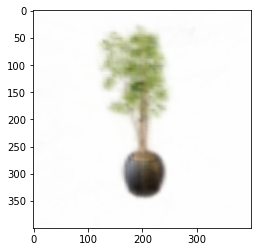

Train Epoch: 0 [0/200 (0%)]	Loss: 0.010628
Train Epoch: 0 [10/200 (5%)]	Loss: 0.010283
Train Epoch: 0 [20/200 (10%)]	Loss: 0.011440
Train Epoch: 0 [30/200 (15%)]	Loss: 0.010824
Train Epoch: 0 [40/200 (20%)]	Loss: 0.010149
Train Epoch: 0 [50/200 (25%)]	Loss: 0.010778
Train Epoch: 0 [60/200 (30%)]	Loss: 0.010325
Train Epoch: 0 [70/200 (35%)]	Loss: 0.009876
Train Epoch: 0 [80/200 (40%)]	Loss: 0.010174
Train Epoch: 0 [90/200 (45%)]	Loss: 0.010656
Train Epoch: 0 [100/200 (50%)]	Loss: 0.010029
Train Epoch: 0 [110/200 (55%)]	Loss: 0.009919
Train Epoch: 0 [120/200 (60%)]	Loss: 0.011325
Train Epoch: 0 [130/200 (65%)]	Loss: 0.011601
Train Epoch: 0 [140/200 (70%)]	Loss: 0.010165
Train Epoch: 0 [150/200 (75%)]	Loss: 0.009362
Train Epoch: 0 [160/200 (80%)]	Loss: 0.010055
Train Epoch: 0 [170/200 (85%)]	Loss: 0.010633
Train Epoch: 0 [180/200 (90%)]	Loss: 0.009651
Train Epoch: 0 [190/200 (95%)]	Loss: 0.010934


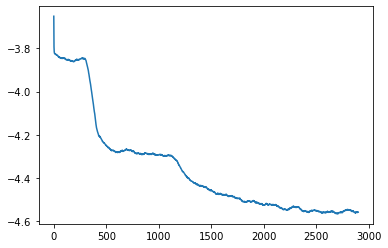

 12%|█████▌                                      | 1/8 [01:59<13:55, 119.36s/it]

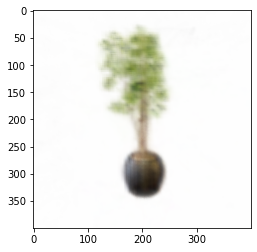

Train Epoch: 1 [0/200 (0%)]	Loss: 0.010034
Train Epoch: 1 [10/200 (5%)]	Loss: 0.009149
Train Epoch: 1 [20/200 (10%)]	Loss: 0.010045
Train Epoch: 1 [30/200 (15%)]	Loss: 0.010466
Train Epoch: 1 [40/200 (20%)]	Loss: 0.010783
Train Epoch: 1 [50/200 (25%)]	Loss: 0.010465
Train Epoch: 1 [60/200 (30%)]	Loss: 0.010615
Train Epoch: 1 [70/200 (35%)]	Loss: 0.009774
Train Epoch: 1 [80/200 (40%)]	Loss: 0.011082
Train Epoch: 1 [90/200 (45%)]	Loss: 0.010538
Train Epoch: 1 [100/200 (50%)]	Loss: 0.009528
Train Epoch: 1 [110/200 (55%)]	Loss: 0.011037
Train Epoch: 1 [120/200 (60%)]	Loss: 0.009309
Train Epoch: 1 [130/200 (65%)]	Loss: 0.009113
Train Epoch: 1 [140/200 (70%)]	Loss: 0.011263
Train Epoch: 1 [150/200 (75%)]	Loss: 0.010124
Train Epoch: 1 [160/200 (80%)]	Loss: 0.012276
Train Epoch: 1 [170/200 (85%)]	Loss: 0.011167
Train Epoch: 1 [180/200 (90%)]	Loss: 0.009979
Train Epoch: 1 [190/200 (95%)]	Loss: 0.010835


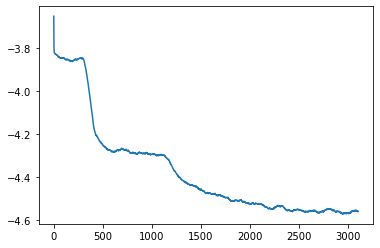

 25%|███████████                                 | 2/8 [03:58<11:57, 119.52s/it]

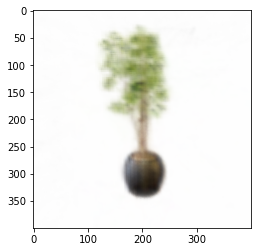

Train Epoch: 2 [0/200 (0%)]	Loss: 0.009882
Train Epoch: 2 [10/200 (5%)]	Loss: 0.010831
Train Epoch: 2 [20/200 (10%)]	Loss: 0.009558
Train Epoch: 2 [30/200 (15%)]	Loss: 0.009979
Train Epoch: 2 [40/200 (20%)]	Loss: 0.011258
Train Epoch: 2 [50/200 (25%)]	Loss: 0.010940
Train Epoch: 2 [60/200 (30%)]	Loss: 0.010767
Train Epoch: 2 [70/200 (35%)]	Loss: 0.010517
Train Epoch: 2 [80/200 (40%)]	Loss: 0.009993
Train Epoch: 2 [90/200 (45%)]	Loss: 0.009981
Train Epoch: 2 [100/200 (50%)]	Loss: 0.008931
Train Epoch: 2 [110/200 (55%)]	Loss: 0.010508
Train Epoch: 2 [120/200 (60%)]	Loss: 0.010423
Train Epoch: 2 [130/200 (65%)]	Loss: 0.011051
Train Epoch: 2 [140/200 (70%)]	Loss: 0.010579
Train Epoch: 2 [150/200 (75%)]	Loss: 0.009944
Train Epoch: 2 [160/200 (80%)]	Loss: 0.010473
Train Epoch: 2 [170/200 (85%)]	Loss: 0.010628
Train Epoch: 2 [180/200 (90%)]	Loss: 0.010135
Train Epoch: 2 [190/200 (95%)]	Loss: 0.010275


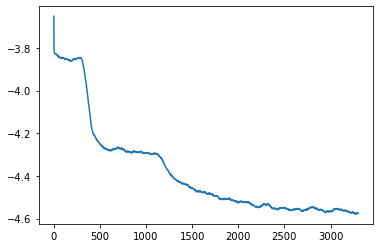

 38%|████████████████▌                           | 3/8 [05:57<09:56, 119.20s/it]

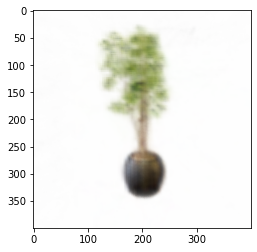

Train Epoch: 3 [0/200 (0%)]	Loss: 0.009413
Train Epoch: 3 [10/200 (5%)]	Loss: 0.011015
Train Epoch: 3 [20/200 (10%)]	Loss: 0.010702
Train Epoch: 3 [30/200 (15%)]	Loss: 0.010483
Train Epoch: 3 [40/200 (20%)]	Loss: 0.010495
Train Epoch: 3 [50/200 (25%)]	Loss: 0.010085
Train Epoch: 3 [60/200 (30%)]	Loss: 0.010490
Train Epoch: 3 [70/200 (35%)]	Loss: 0.010558
Train Epoch: 3 [80/200 (40%)]	Loss: 0.009682
Train Epoch: 3 [90/200 (45%)]	Loss: 0.010113
Train Epoch: 3 [100/200 (50%)]	Loss: 0.010872
Train Epoch: 3 [110/200 (55%)]	Loss: 0.009887
Train Epoch: 3 [120/200 (60%)]	Loss: 0.011044
Train Epoch: 3 [130/200 (65%)]	Loss: 0.010894
Train Epoch: 3 [140/200 (70%)]	Loss: 0.009971
Train Epoch: 3 [150/200 (75%)]	Loss: 0.010953
Train Epoch: 3 [160/200 (80%)]	Loss: 0.010025
Train Epoch: 3 [170/200 (85%)]	Loss: 0.010796
Train Epoch: 3 [180/200 (90%)]	Loss: 0.010079
Train Epoch: 3 [190/200 (95%)]	Loss: 0.010364


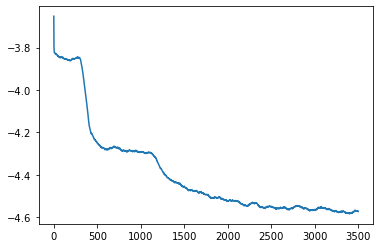

 50%|██████████████████████                      | 4/8 [07:57<07:57, 119.35s/it]

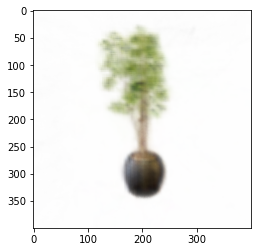

Train Epoch: 4 [0/200 (0%)]	Loss: 0.010287
Train Epoch: 4 [10/200 (5%)]	Loss: 0.009656
Train Epoch: 4 [20/200 (10%)]	Loss: 0.009937
Train Epoch: 4 [30/200 (15%)]	Loss: 0.009859
Train Epoch: 4 [40/200 (20%)]	Loss: 0.010217
Train Epoch: 4 [50/200 (25%)]	Loss: 0.010460
Train Epoch: 4 [60/200 (30%)]	Loss: 0.011104
Train Epoch: 4 [70/200 (35%)]	Loss: 0.010111
Train Epoch: 4 [80/200 (40%)]	Loss: 0.010358
Train Epoch: 4 [90/200 (45%)]	Loss: 0.010214
Train Epoch: 4 [100/200 (50%)]	Loss: 0.009629
Train Epoch: 4 [110/200 (55%)]	Loss: 0.010419
Train Epoch: 4 [120/200 (60%)]	Loss: 0.010395
Train Epoch: 4 [130/200 (65%)]	Loss: 0.010688
Train Epoch: 4 [140/200 (70%)]	Loss: 0.010554
Train Epoch: 4 [150/200 (75%)]	Loss: 0.009679
Train Epoch: 4 [160/200 (80%)]	Loss: 0.010236
Train Epoch: 4 [170/200 (85%)]	Loss: 0.010338
Train Epoch: 4 [180/200 (90%)]	Loss: 0.009788
Train Epoch: 4 [190/200 (95%)]	Loss: 0.010548


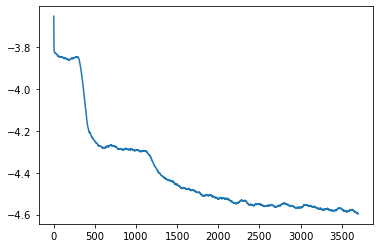

 62%|███████████████████████████▌                | 5/8 [09:57<05:58, 119.44s/it]

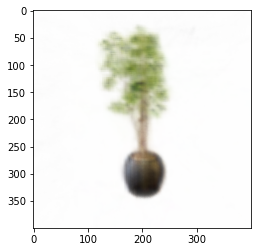

Train Epoch: 5 [0/200 (0%)]	Loss: 0.009708
Train Epoch: 5 [10/200 (5%)]	Loss: 0.009918
Train Epoch: 5 [20/200 (10%)]	Loss: 0.010116
Train Epoch: 5 [30/200 (15%)]	Loss: 0.009200
Train Epoch: 5 [40/200 (20%)]	Loss: 0.010778
Train Epoch: 5 [50/200 (25%)]	Loss: 0.010658
Train Epoch: 5 [60/200 (30%)]	Loss: 0.009877
Train Epoch: 5 [70/200 (35%)]	Loss: 0.009817
Train Epoch: 5 [80/200 (40%)]	Loss: 0.010328
Train Epoch: 5 [90/200 (45%)]	Loss: 0.009247
Train Epoch: 5 [100/200 (50%)]	Loss: 0.010698
Train Epoch: 5 [110/200 (55%)]	Loss: 0.009230
Train Epoch: 5 [120/200 (60%)]	Loss: 0.010248
Train Epoch: 5 [130/200 (65%)]	Loss: 0.008973
Train Epoch: 5 [140/200 (70%)]	Loss: 0.011291
Train Epoch: 5 [150/200 (75%)]	Loss: 0.010082
Train Epoch: 5 [160/200 (80%)]	Loss: 0.009662
Train Epoch: 5 [170/200 (85%)]	Loss: 0.010465
Train Epoch: 5 [180/200 (90%)]	Loss: 0.010990
Train Epoch: 5 [190/200 (95%)]	Loss: 0.009702


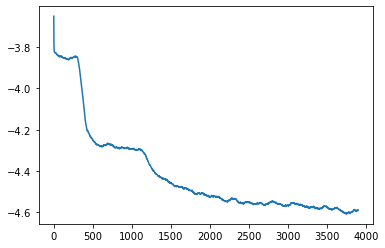

 75%|█████████████████████████████████           | 6/8 [11:56<03:58, 119.49s/it]

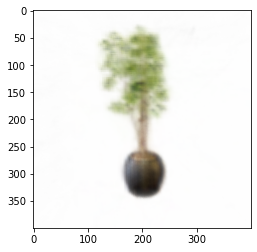

Train Epoch: 6 [0/200 (0%)]	Loss: 0.010653
Train Epoch: 6 [10/200 (5%)]	Loss: 0.009709
Train Epoch: 6 [20/200 (10%)]	Loss: 0.010745
Train Epoch: 6 [30/200 (15%)]	Loss: 0.009937
Train Epoch: 6 [40/200 (20%)]	Loss: 0.009480
Train Epoch: 6 [50/200 (25%)]	Loss: 0.010622
Train Epoch: 6 [60/200 (30%)]	Loss: 0.009702
Train Epoch: 6 [70/200 (35%)]	Loss: 0.009723
Train Epoch: 6 [80/200 (40%)]	Loss: 0.010187
Train Epoch: 6 [90/200 (45%)]	Loss: 0.010724
Train Epoch: 6 [100/200 (50%)]	Loss: 0.009188
Train Epoch: 6 [110/200 (55%)]	Loss: 0.008983
Train Epoch: 6 [120/200 (60%)]	Loss: 0.009425
Train Epoch: 6 [130/200 (65%)]	Loss: 0.009478
Train Epoch: 6 [140/200 (70%)]	Loss: 0.009710
Train Epoch: 6 [150/200 (75%)]	Loss: 0.010162
Train Epoch: 6 [160/200 (80%)]	Loss: 0.009740
Train Epoch: 6 [170/200 (85%)]	Loss: 0.010004
Train Epoch: 6 [180/200 (90%)]	Loss: 0.009369
Train Epoch: 6 [190/200 (95%)]	Loss: 0.010282


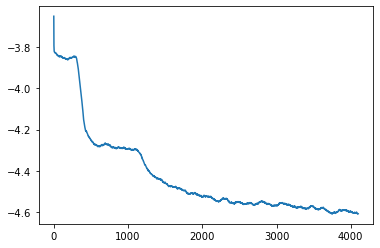

 88%|██████████████████████████████████████▌     | 7/8 [13:56<01:59, 119.52s/it]

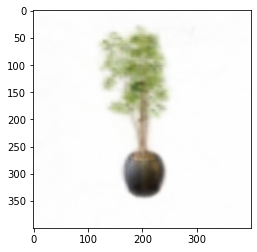

Train Epoch: 7 [0/200 (0%)]	Loss: 0.009618
Train Epoch: 7 [10/200 (5%)]	Loss: 0.009076
Train Epoch: 7 [20/200 (10%)]	Loss: 0.008478
Train Epoch: 7 [30/200 (15%)]	Loss: 0.009633
Train Epoch: 7 [40/200 (20%)]	Loss: 0.009941
Train Epoch: 7 [50/200 (25%)]	Loss: 0.010729
Train Epoch: 7 [60/200 (30%)]	Loss: 0.009863
Train Epoch: 7 [70/200 (35%)]	Loss: 0.009918
Train Epoch: 7 [80/200 (40%)]	Loss: 0.010653
Train Epoch: 7 [90/200 (45%)]	Loss: 0.009133
Train Epoch: 7 [100/200 (50%)]	Loss: 0.010052
Train Epoch: 7 [110/200 (55%)]	Loss: 0.010168
Train Epoch: 7 [120/200 (60%)]	Loss: 0.009790
Train Epoch: 7 [130/200 (65%)]	Loss: 0.009489
Train Epoch: 7 [140/200 (70%)]	Loss: 0.009782
Train Epoch: 7 [150/200 (75%)]	Loss: 0.010138
Train Epoch: 7 [160/200 (80%)]	Loss: 0.010454
Train Epoch: 7 [170/200 (85%)]	Loss: 0.009706
Train Epoch: 7 [180/200 (90%)]	Loss: 0.011324
Train Epoch: 7 [190/200 (95%)]	Loss: 0.009451


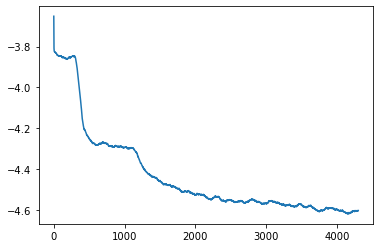

100%|████████████████████████████████████████████| 8/8 [15:55<00:00, 119.47s/it]


In [123]:
N_points=200

def train(epoch, optimizer):
    losses=[]
    for batch_idx, (rays, pixels) in enumerate(train_loader):
        rays, pixels = (rays[0].to(device),rays[1].to(device)), pixels.to(device)
        optimizer.zero_grad()
        
        pix_estims = VG.render_rays(rays, (N_points))
        
        loss = ((pix_estims-pixels)**2).sum()/rays[0].shape[0] +0.0001*VG.total_variation()
        #loss = ((pix_estims-pixels)**2).sum()/rays[0].shape[0]
        loss.backward()
        losses.append(loss.item())
        #VG.update_grads(1000)
        optimizer.step()
        VG.clamp()
        if batch_idx%10==0:
            print(
                    "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                        epoch,
                        batch_idx,
                        len(train_loader),
                        100.0 * batch_idx / len(train_loader),
                        loss.data.item(),
                    )
                )
    return losses

epochss = [2,4,8, 8]
N_pointss = [50, 100, 200, 200]
lrs = [1000, 1000, 500, 500]


for epochs, N_points, lr in zip(epochss,N_pointss, lrs):
    VG.subdivide()
    optimizer = torch.optim.SGD(
                [VG.colors, VG.opacities], 
                lr=lr
            )


    for epoch in tqdm(range(epochs)):
        new_im = VG.render_large_image_from_rays(disp_rays[0],(500,1.2))
        plt.imshow(new_im)
        plt.show()

        #VG.save()
        losses += train(epoch, optimizer)
        plt.plot(np.log(rolling_average(np.array(losses))))
        plt.show()
    


    

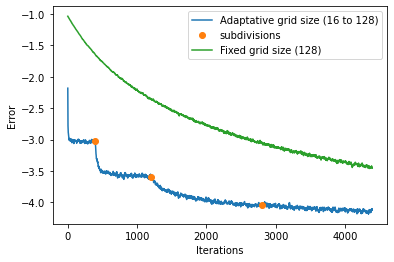

In [74]:


loss_tab = np.log(rolling_average(np.array(losses2), 10))
plt.plot(loss_tab, label='Adaptative grid size (16 to 128)')


x = np.array([200*2-10, 200*6, 200*14])
y = loss_tab[x.astype(int)]

plt.plot(x,y,'o', label='subdivisions')



loss_tab = rolling_average(np.array(losses), 10)
plt.plot(np.log(loss_tab), label='Fixed grid size (128)')

plt.ylabel("Error")
plt.xlabel("Iterations")
plt.legend()
#plt.savefig('exports/training.png')

In [30]:
x.astype(int)

array([   0,   22,   44,   66,   88,  110,  132,  154,  176,  198,  221,
        243,  265,  287,  309,  331,  353,  375,  397,  420,  442,  464,
        486,  508,  530,  552,  574,  596,  619,  641,  663,  685,  707,
        729,  751,  773,  795,  818,  840,  862,  884,  906,  928,  950,
        972,  994, 1017, 1039, 1061, 1083, 1105, 1127, 1149, 1171, 1193,
       1216, 1238, 1260, 1282, 1304, 1326, 1348, 1370, 1392, 1415, 1437,
       1459, 1481, 1503, 1525, 1547, 1569, 1591, 1614, 1636, 1658, 1680,
       1702, 1724, 1746, 1768, 1790, 1813, 1835, 1857, 1879, 1901, 1923,
       1945, 1967, 1989, 2012, 2034, 2056, 2078, 2100, 2122, 2144, 2166,
       2188, 2211, 2233, 2255, 2277, 2299, 2321, 2343, 2365, 2387, 2410,
       2432, 2454, 2476, 2498, 2520, 2542, 2564, 2586, 2609, 2631, 2653,
       2675, 2697, 2719, 2741, 2763, 2785, 2808, 2830, 2852, 2874, 2896,
       2918, 2940, 2962, 2984, 3007, 3029, 3051, 3073, 3095, 3117, 3139,
       3161, 3183, 3206, 3228, 3250, 3272, 3294, 33

In [30]:
VG.save_pointcloud()

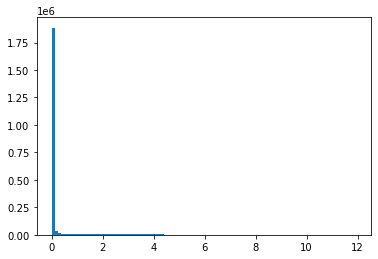

KeyboardInterrupt: 

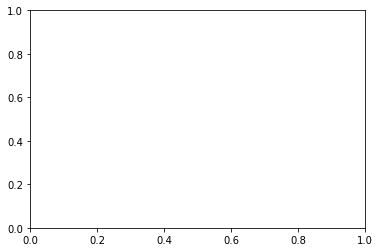

In [23]:
plt.hist(VG.opacities.tolist(), bins=100)
plt.show()
plt.hist(VG.colors.flatten().tolist())
plt.show()




In [28]:
VG2.save_magica_vox(0.4)
#VG.save('.obj')

100%|███████████████████████████████████████████| 64/64 [00:25<00:00,  2.51it/s]


In [26]:
c = VG2.make_palette(16)

ValueError: Image RGB array must be uint8 or floating point; found int64

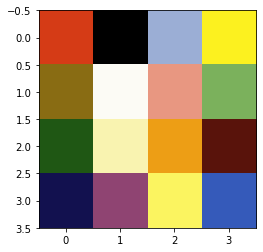

In [27]:
plt.imshow(c[1][:,:3].reshape((4,4,3)))

#plt.imsave('exporsts/64_best_palette.png', c[1][:,:3].reshape((4,4,3)))

In [22]:
all_c2w[image_ind]

disp_rays[image_ind][0][0,:,0]**2

array([8.33201508, 6.31625955, 1.60172607])

In [91]:
VG.save('materials64_sph.obj')

# TEST

In [13]:
VG2 = VoxelGrid()
VG2.load('16a_39.obj')


In [22]:
len(disp_ims_test)

200

In [22]:
VG2 = VoxelGrid()
VG2.load('materials64.obj')

In [130]:
VG2 = VG.copy()
VG.subdivide()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


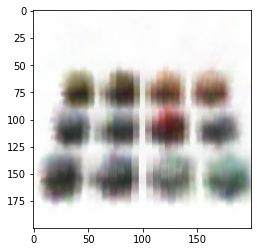

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


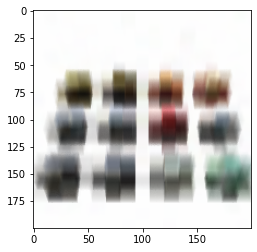

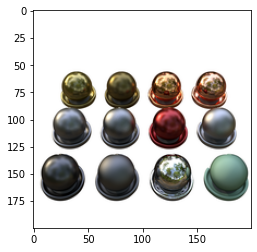

In [131]:
image_ind=0

new_im = VG.render_large_image_from_rays(disp_rays_test[image_ind],(1000,1.2))
new_im2 = VG2.render_large_image_from_rays(disp_rays_test[image_ind],(1000,1.2))


plt.imshow(new_im)
plt.show()
plt.imshow(new_im2)
plt.show()

plt.imshow(disp_ims_test[image_ind])

# ROTATION

In [136]:
VG.load('materials.obj')


In [141]:
cust_c2ws = create_rotation_matrices(1.5,-20, n=60)
red_fac=4
ordir_rays=[]
for c2w in cust_c2ws:
    ray_np = get_rays_np(800,800, focal, c2w)
    oris = ray_np[0][::red_fac,::red_fac]
    direct = ray_np[1][::red_fac,::red_fac] # direction. optimal fac:3
    ordir_rays.append((oris, direct))

  0%|                                                    | 0/60 [00:00<?, ?it/s]

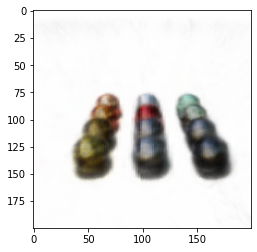

  2%|▋                                           | 1/60 [00:00<00:10,  5.73it/s]

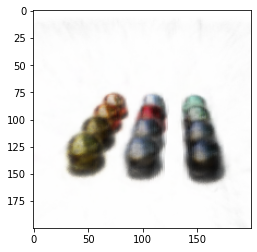

  3%|█▍                                          | 2/60 [00:00<00:10,  5.74it/s]

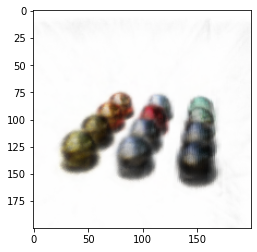

  5%|██▏                                         | 3/60 [00:00<00:09,  5.74it/s]

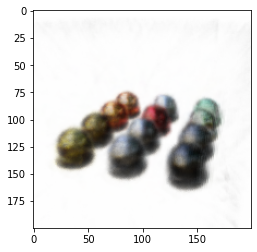

  7%|██▉                                         | 4/60 [00:00<00:09,  5.74it/s]

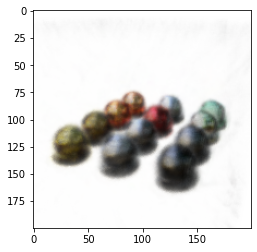

  8%|███▋                                        | 5/60 [00:00<00:09,  5.71it/s]

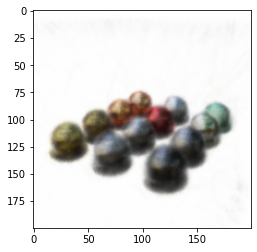

 10%|████▍                                       | 6/60 [00:01<00:09,  5.71it/s]

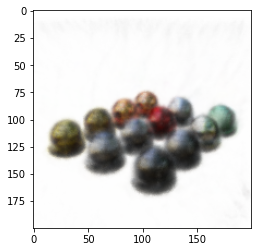

 12%|█████▏                                      | 7/60 [00:01<00:09,  5.71it/s]

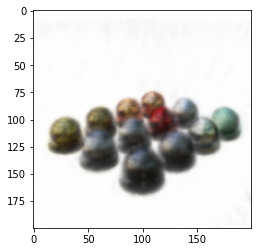

 13%|█████▊                                      | 8/60 [00:01<00:09,  5.71it/s]

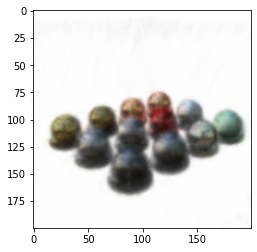

 15%|██████▌                                     | 9/60 [00:01<00:08,  5.69it/s]

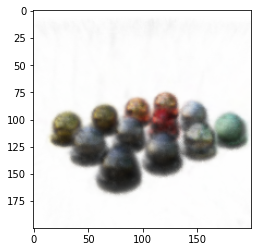

 17%|███████▏                                   | 10/60 [00:01<00:08,  5.69it/s]

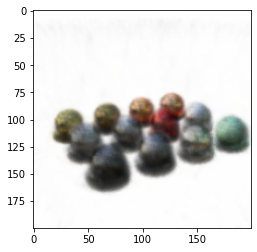

 18%|███████▉                                   | 11/60 [00:01<00:08,  5.68it/s]

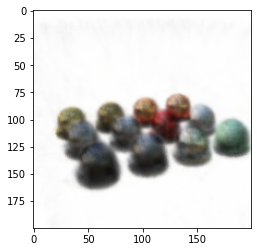

 20%|████████▌                                  | 12/60 [00:02<00:08,  5.69it/s]

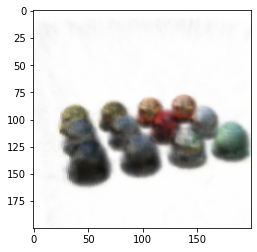

 22%|█████████▎                                 | 13/60 [00:02<00:08,  5.69it/s]

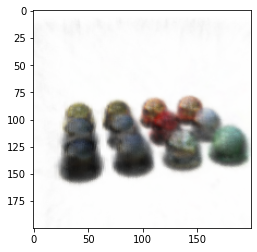

 23%|██████████                                 | 14/60 [00:02<00:08,  5.70it/s]

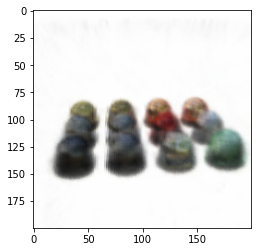

 25%|██████████▊                                | 15/60 [00:02<00:07,  5.70it/s]

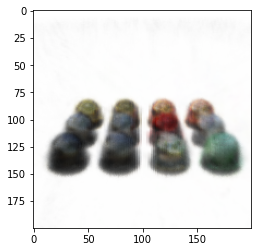

 27%|███████████▍                               | 16/60 [00:02<00:07,  5.71it/s]

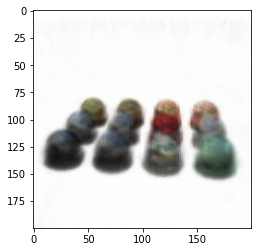

 28%|████████████▏                              | 17/60 [00:02<00:07,  5.70it/s]

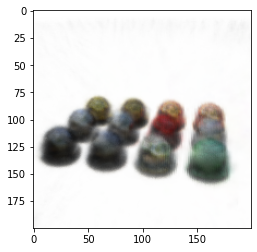

 30%|████████████▉                              | 18/60 [00:03<00:07,  5.71it/s]

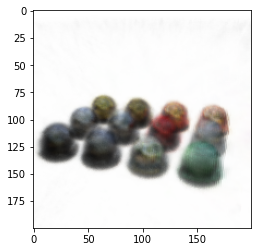

 32%|█████████████▌                             | 19/60 [00:03<00:07,  5.71it/s]

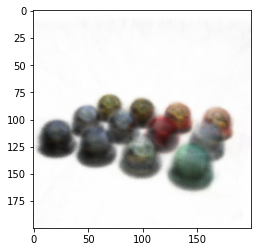

 33%|██████████████▎                            | 20/60 [00:03<00:07,  5.71it/s]

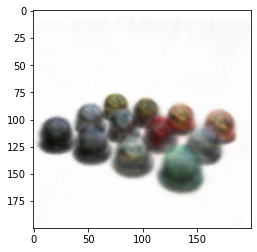

 35%|███████████████                            | 21/60 [00:03<00:06,  5.70it/s]

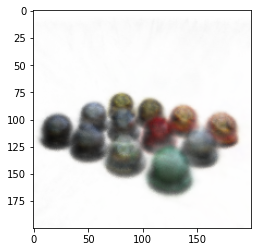

 37%|███████████████▊                           | 22/60 [00:03<00:06,  5.70it/s]

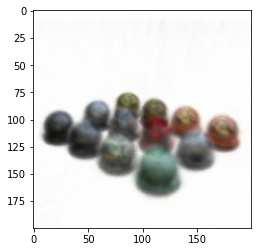

 38%|████████████████▍                          | 23/60 [00:04<00:06,  5.70it/s]

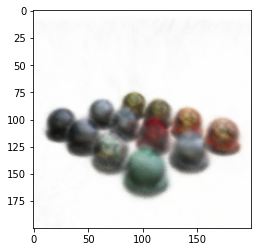

 40%|█████████████████▏                         | 24/60 [00:04<00:06,  5.70it/s]

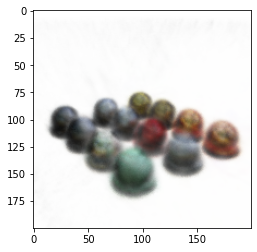

 42%|█████████████████▉                         | 25/60 [00:04<00:06,  5.71it/s]

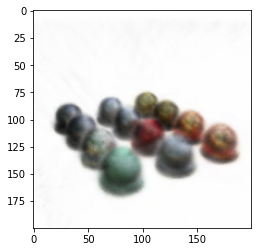

 43%|██████████████████▋                        | 26/60 [00:04<00:05,  5.71it/s]

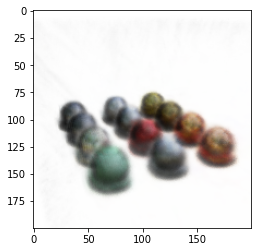

 45%|███████████████████▎                       | 27/60 [00:04<00:05,  5.72it/s]

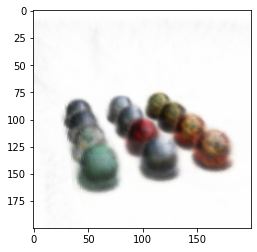

 47%|████████████████████                       | 28/60 [00:04<00:05,  5.70it/s]

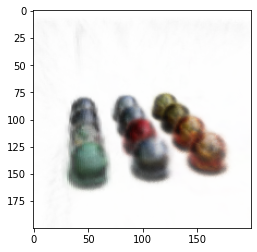

 48%|████████████████████▊                      | 29/60 [00:05<00:05,  5.72it/s]

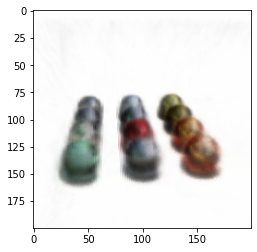

 50%|█████████████████████▌                     | 30/60 [00:05<00:05,  5.73it/s]

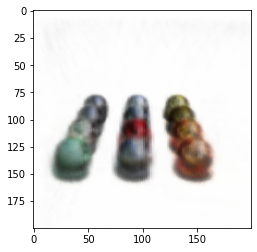

 52%|██████████████████████▏                    | 31/60 [00:05<00:05,  5.74it/s]

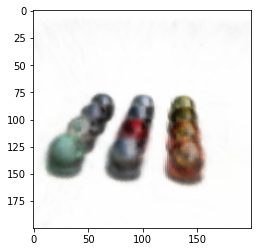

 53%|██████████████████████▉                    | 32/60 [00:05<00:04,  5.73it/s]

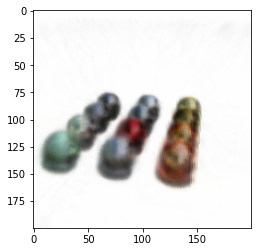

 55%|███████████████████████▋                   | 33/60 [00:05<00:04,  5.73it/s]

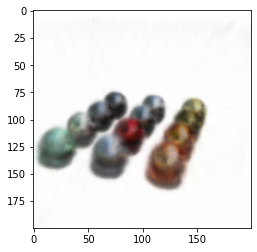

 57%|████████████████████████▎                  | 34/60 [00:05<00:04,  5.72it/s]

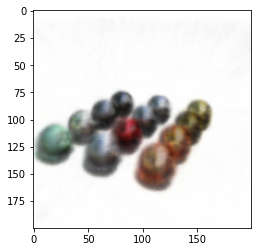

 58%|█████████████████████████                  | 35/60 [00:06<00:04,  5.72it/s]

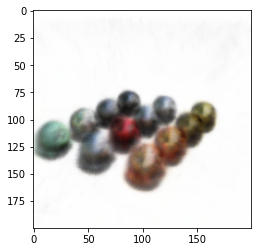

 60%|█████████████████████████▊                 | 36/60 [00:06<00:04,  5.72it/s]

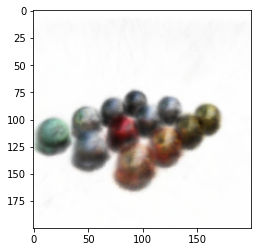

 62%|██████████████████████████▌                | 37/60 [00:06<00:04,  5.71it/s]

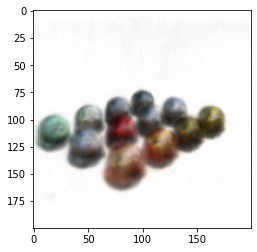

 63%|███████████████████████████▏               | 38/60 [00:06<00:03,  5.91it/s]

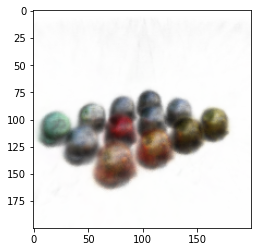

 65%|███████████████████████████▉               | 39/60 [00:06<00:03,  6.08it/s]

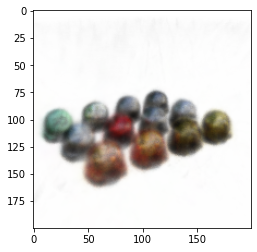

 67%|████████████████████████████▋              | 40/60 [00:06<00:03,  6.22it/s]

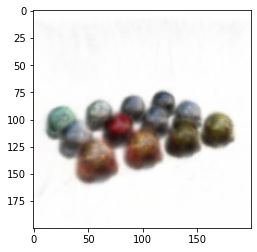

 68%|█████████████████████████████▍             | 41/60 [00:07<00:03,  6.32it/s]

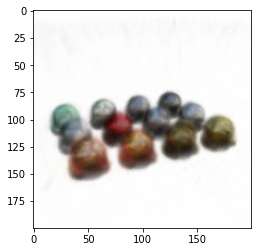

 70%|██████████████████████████████             | 42/60 [00:07<00:02,  6.40it/s]

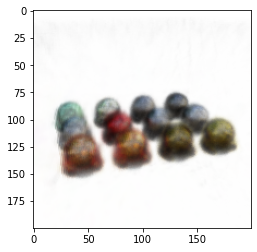

 72%|██████████████████████████████▊            | 43/60 [00:07<00:02,  6.45it/s]

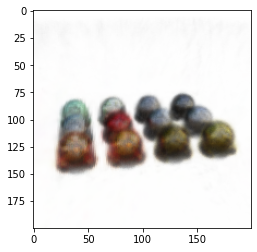

 73%|███████████████████████████████▌           | 44/60 [00:07<00:02,  6.49it/s]

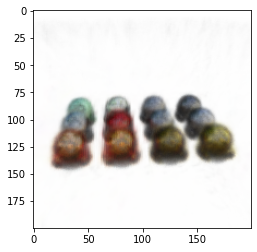

 75%|████████████████████████████████▎          | 45/60 [00:07<00:02,  6.52it/s]

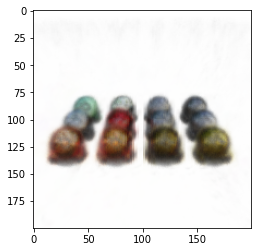

 77%|████████████████████████████████▉          | 46/60 [00:07<00:02,  5.91it/s]

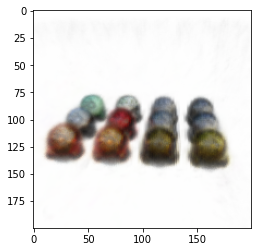

 78%|█████████████████████████████████▋         | 47/60 [00:08<00:02,  5.85it/s]

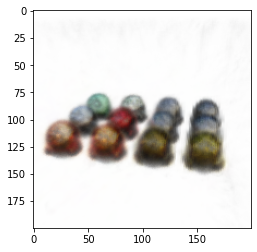

 80%|██████████████████████████████████▍        | 48/60 [00:08<00:02,  5.81it/s]

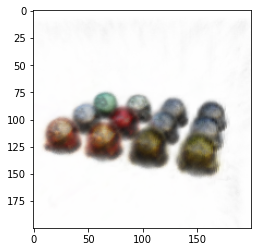

 82%|███████████████████████████████████        | 49/60 [00:08<00:01,  5.79it/s]

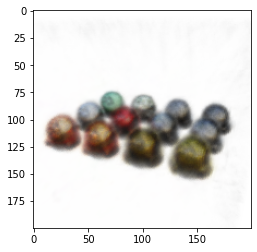

 83%|███████████████████████████████████▊       | 50/60 [00:08<00:01,  5.78it/s]

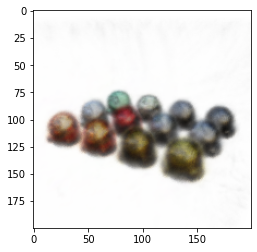

 85%|████████████████████████████████████▌      | 51/60 [00:08<00:01,  5.75it/s]

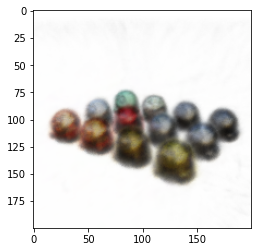

 87%|█████████████████████████████████████▎     | 52/60 [00:08<00:01,  5.73it/s]

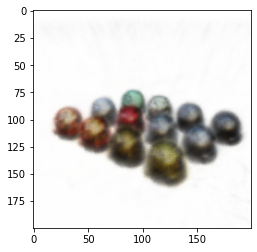

 88%|█████████████████████████████████████▉     | 53/60 [00:09<00:01,  5.73it/s]

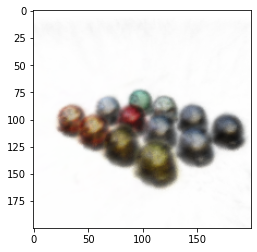

 90%|██████████████████████████████████████▋    | 54/60 [00:09<00:01,  5.73it/s]

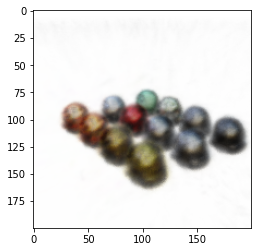

 92%|███████████████████████████████████████▍   | 55/60 [00:09<00:00,  5.72it/s]

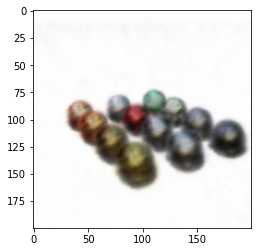

 93%|████████████████████████████████████████▏  | 56/60 [00:09<00:00,  5.72it/s]

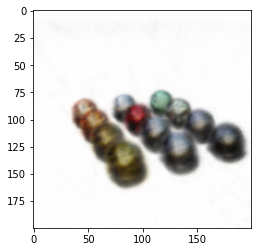

 95%|████████████████████████████████████████▊  | 57/60 [00:09<00:00,  5.72it/s]

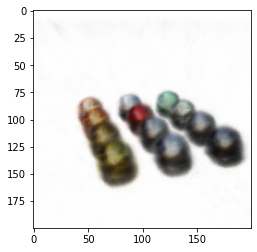

 97%|█████████████████████████████████████████▌ | 58/60 [00:10<00:00,  5.71it/s]

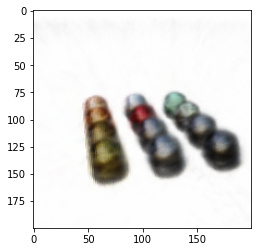

 98%|██████████████████████████████████████████▎| 59/60 [00:10<00:00,  5.72it/s]

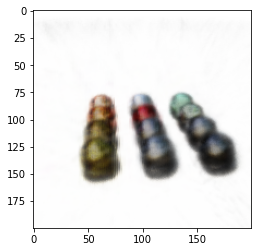

100%|███████████████████████████████████████████| 60/60 [00:10<00:00,  5.79it/s]


In [142]:
imgs=[]
for image_ind in tqdm(range(len(cust_c2ws))):
    with torch.no_grad():
        new_im = VG.render_large_image_from_rays(ordir_rays[image_ind],(500, 1.2))
        plt.imshow(new_im)
        plt.show()
        imgs.append(np.uint8(255*new_im))

In [143]:
imageio.mimwrite('screenshots/movies_materials.gif', imgs,  format='GIF', duration=0.04)

In [144]:
VG.save_pointcloud()

In [11]:
rays_or_dir = [get_rays_np(800,800, focal, c2w) for c2w in all_c2w]

In [12]:
camera_centers = get_cameras_centers(rays_or_dir)

[3.8 0.  1. ]


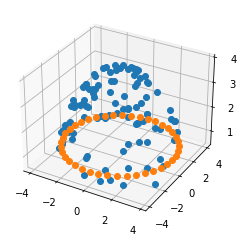

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot( camera_centers[:,0], camera_centers[:, 1], camera_centers[:,2], 'o')

n = 40
t = np.linspace(0,2*np.pi, n+1)[:-1]
cust_centers = np.zeros((n,3))
cust_centers[:,0] = np.cos(t)*3.8
cust_centers[:,1] = np.sin(t)*3.8
cust_centers[:,2] = 1

cust_c2ws = [create_rotation_transformation_matrix(cust_centers[i], t[i], -np.pi*0.1) for i in range(n)]

ax.plot( cust_centers[:,0], cust_centers[:,1], cust_centers[:,2], 'o')

print(cust_centers[0])



In [12]:
L=[]
k=0
i=0
while i<39:
    k+=1
    for _ in range(4):
        L.append(i)
        i+=k
L

[0, 1, 2, 3, 4, 6, 8, 10, 12, 15, 18, 21, 24, 28, 32, 36]

In [64]:
L = range(15)

In [8]:

images=[]
for ind in tqdm(range(34)):
    VG.load('16sph'+str(ind)+'.obj')
    for image_ind in (range(len(cust_c2ws))):
        new_im = VG.render_large_image_from_rays(ordir_rays[image_ind], (1000, 1.2))
        img = Image.fromarray(np.uint8(255*np.clip(new_im,0,1)))
        draw = ImageDraw.Draw(img)
        draw.text((10, 10),"Epoch:"+str(ind),(0,0,0))
        images.append(np.array(img))
        #plt.imshow(images[-1])
        #plt.show()
        #images.append(np.uint8(255*new_im))
        #plt.imsave('screenshots/rotate/'+str(ind)+'_'+str(image_ind)+'.png', new_im)


100%|███████████████████████████████████████████| 34/34 [16:56<00:00, 29.89s/it]


In [36]:
images2=[]
k=0
while k<len(images):
    for _ in range(30):
        images2.append(images[k])
        k+=1
    k+=60

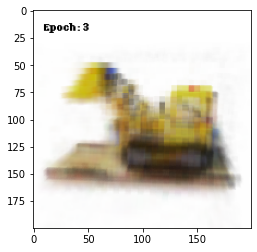

In [45]:
plt.imshow(images2[61])

In [30]:
imageio.mimwrite('screenshots/movies_drums2.gif', imgs,  format='GIF', duration=0.04)

# Interp

In [33]:
class Voxel_dev(VoxelGridSpherical):
    def in_bounds_indices(self, p):
        ''' input: Nx3 array
            output: index of valid arrays'''
        in_x = (p[...,0]>=0)*(p[...,0]<(self.size-1))
        in_y = (p[...,1]>=0)*(p[...,1]<(self.size-1))
        in_z = (p[...,2]>=0)*(p[...,2]<(self.size-1))
        return in_x*in_y*in_z
   

    def render_rays(self, ordir_tuple, N_points, inv_depth=1.2):

        ori = ordir_tuple[0][:, None,:]

        # WARNING: Assuming constant distance
        distances = 10*torch.sqrt( (ordir_tuple[1]**2).sum(1, keepdim=True))/inv_depth/(N_points-1)
        scatter_points = torch.rand_like(distances)*distances + torch.linspace(0,10, N_points, device=device)[None, :]/inv_depth
        p = ori + scatter_points[:,:,None]*(ordir_tuple[1][:, None, :])
        
        offsets = [np.array([0,0,0]), 
                   np.array([1,0,0]), 
                   np.array([0,0,1]),
                   np.array([1,0,1]),
                   np.array([0,1,0]),
                   np.array([1,1,0]),  
                   np.array([0,1,1]),
                   np.array([1,1,1])]
        #indicies
        p = self.descartes_to_indices(p)   
        p0 = torch.floor(p)
        in_bounds = self.in_bounds_indices(p)
        diff = (p-p0)
        ind_offsets = []
        for i in range(8):
            mesh_coords = self.flatten_3d_indices(p0+torch.tensor(offsets[i]).to(device)).long()
            mesh_coords[torch.logical_not(in_bounds)] = 0
            ind_offsets.append(mesh_coords)


        harmonics = self.view_harmonics(p[0,0])
        
        
        
        # color interp
        ciii = [torch.tensordot(self.colors[ind_offsets[i]],harmonics, dims=([-1], [0]))
                *(1-diff[...,0, None])+
                torch.tensordot(self.colors[ind_offsets[i+1]],harmonics, dims=([-1], [0]))
                *diff[...,0, None] for i in range(0,8,2)]
        cii = [ciii[i]*(1-diff[...,1, None]) + ciii[i+2]*diff[...,1, None] for i in [0,1]]
        colors = cii[0]*(1-diff[...,2, None])+cii[1]*diff[...,2, None]
        
        # opacities interp
        ciii = [self.opacities[ind_offsets[i]]
                *(1-diff[...,0]) +
                self.opacities[ind_offsets[i+1]]
                *diff[...,0] for i in range(0,8,2)]
        cii = [ciii[i]*(1-diff[...,1]) + ciii[i+2]*diff[...,1] for i in [0,1]]
        opacities = (cii[0]*(1-diff[...,2])+cii[1]*diff[...,2])
        
        opacities = opacities*distances*in_bounds.float() # REMOVE
        cumsum_opacities = torch.cumsum(opacities, 1)

        transp_term = torch.exp(-cumsum_opacities)*(1-torch.exp(-opacities))
        return (colors*transp_term[..., None]).sum(1)
    


In [63]:
VG = VoxelGridSpherical()
VG.load('16sph32.obj')

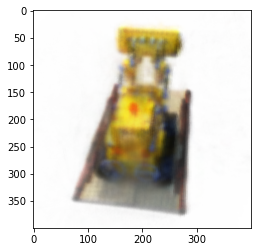

In [90]:
plt.imshow(VG.render_large_image_from_rays(disp_rays[27], (1000, 1.2)))

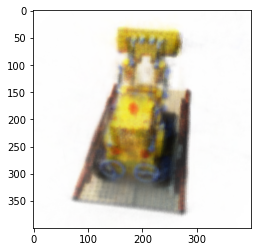

In [89]:
VG2 = VoxelGrid()
VG2.load('16a_32.obj')
plt.imshow(VG2.render_large_image_from_rays(disp_rays[27], (1000, 1.2)))

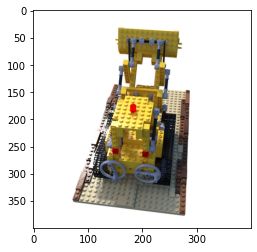

In [88]:
plt.imshow(disp_ims[27])

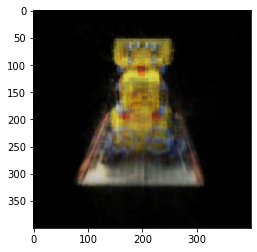

In [25]:
plt.imshow(VG.render_large_image_from_rays(disp_rays[0], (500, 1.2)))

In [64]:
values_arr = torch.rand((10000, 3, 4))

In [72]:
p = torch.rand((10,3))*100

In [79]:
p0.shape

torch.Size([10, 3])

In [85]:
values_arr.shape

#diff[...,0].shape

torch.Size([10000, 3, 4])

In [89]:
values_arr[ind_offsets[0]].shape

torch.Size([10, 3, 4])